In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/dataset/column_2C_weka.csv")

In [6]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
data['class'] = [1 if each == 'Abnormal' else 0 for each in data['class']]

In [9]:
y = data['class'].values #values methodu ile numpy array'e çevrilir.
x_data = data.drop(["class"],axis=1)

In [10]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)

In [13]:
x_train = x_train.T
x_train.shape

(6, 248)

In [14]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [15]:
print(x_test.shape)

(6, 62)


In [16]:
y_train.shape

(248,)

In [17]:
y_test.shape

(62,)

In [18]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [19]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [20]:
sigmoid(0)

0.5

In [21]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1]   

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]              
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

In [22]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) 
        cost_list.append(cost) 
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost) 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b} 
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') 
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [23]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,114) 
    
    for i in range(z.shape[1]): 
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
                        
    return Y_prediction

Cost after iteration 0: 0.688983
Cost after iteration 10: 0.572259
Cost after iteration 20: 0.544113
Cost after iteration 30: 0.527251
Cost after iteration 40: 0.516134
Cost after iteration 50: 0.508167
Cost after iteration 60: 0.502047
Cost after iteration 70: 0.497079
Cost after iteration 80: 0.492868
Cost after iteration 90: 0.489181
Cost after iteration 100: 0.485874
Cost after iteration 110: 0.482853
Cost after iteration 120: 0.480056
Cost after iteration 130: 0.477441
Cost after iteration 140: 0.474975
Cost after iteration 150: 0.472636
Cost after iteration 160: 0.470407
Cost after iteration 170: 0.468274
Cost after iteration 180: 0.466227
Cost after iteration 190: 0.464255
Cost after iteration 200: 0.462353
Cost after iteration 210: 0.460514
Cost after iteration 220: 0.458731
Cost after iteration 230: 0.457002
Cost after iteration 240: 0.455322
Cost after iteration 250: 0.453687
Cost after iteration 260: 0.452095
Cost after iteration 270: 0.450543
Cost after iteration 280: 0.449

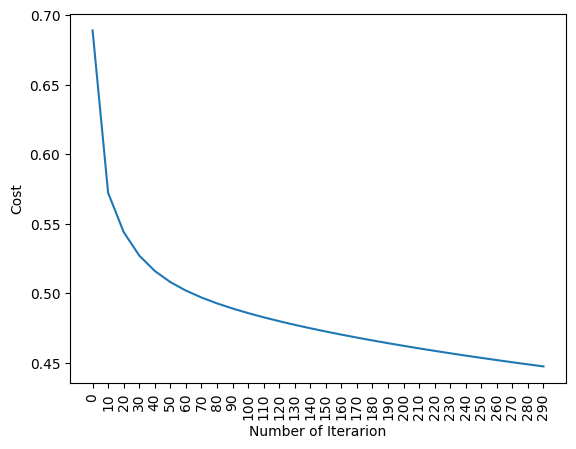

test accuracy: 77.41935483870968 %


In [24]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)

In [25]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=42,max_iter=40)
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=40, random_state=42)

In [26]:
y_pred = lr.predict(x_test.T)

In [27]:
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.7741935483870968
